\begin{center}
\large{\textbf{UNIVERZITET U BEOGRADU}}\\
[0.26cm]
\textsc\huge{\textbf{ELEKTROTEHNIČKI FAKULTET}}\\
[2cm]
\line(1,0){300}\\
[0.25in]
\LARGE\bfseries{Veštačka Inteligencija}\\
[2mm]
\huge\bfseries{PRVI DOMAĆI}\\
[2mm]
\line(1,0){200}\\
[1.5cm]
\textsc\LARGE{Marko Macura}\\
\LARGE{0261/2018}\\
[7cm]
\textsc{\large{Beograd}}
\end{center}

# Simulirano kaljenje

Kao metod za generisanje novih odbiraka sam koristio:
$$x' = x + random(-0.3, 0.3)$$
gde $random(-0.3, 0.3)$ vraća nasumičan broj između -0.3 i 0.3. Ukoliko $x'$ izađe iz domena, onda ponavljam računanje $x'$. Važno je da se ponovi računanje $x'$, jer ukoliko bi se samo postavilo na najbliži rub domena, onda bi se veštački povećavala verovatnoća da se dođe do tog ruba domena. To je u ovom slučaju još veći problem, jer je nula vektor minimum ove funkcije.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def func(x: np.array) -> float:
    """
    

    Parameters
    ----------
    x : np.array
        Ulaz u funkciju.

    Returns
    -------
    float
        Izlaz funkcije koju treba minimizovati.

    """
    if x.size != 3:
        return 1000000
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return 4*(x1*x1 + x2*x2 - x1*x2)**(0.75)/3 + x3

Ova metoda vraća vrednost funkcije u vektoru x.

In [3]:
def sk(x: np.array, T: np.array, Mk: int) -> tuple:
    """
    

    Parameters
    ----------
    x : np.array
        Pocetno stanje.
    T : np.array
        Raspored temperatura.
    Mk : int
        Broj iteracija za svaku temperaturu.

    Returns
    -------
    Niz najboljih resenja i niz trenutnih resenja.

    """
    output = x
    foutput = []
    fx = []
    k = 0
    while k<=T.size and T[k]!=0:
        for m in range(Mk):
            razlika = (np.random.rand(1, 3)[0]*0.6- 0.3)
            x1 = x + razlika
            while np.any(x1>2) or np.any(x1<0):
                razlika = (np.random.rand(1, 3)[0]*0.6- 0.3)
                x1 = x + razlika
            delta = func(x1) - func(x)
            if func(x1) < func(output):
                output = x1
            if delta <= 0:
                x = x1
            else:
                if random.random() <= math.exp(-delta/T[k]):
                    x = x1
            fx = fx + [func(x)]
            foutput = foutput + [func(output)]
        k = k+1
    return output, x, foutput, fx

Ova funkcija radi simulirano kaljenje. 

Text(0, 0.5, 'izlaz funkcije')

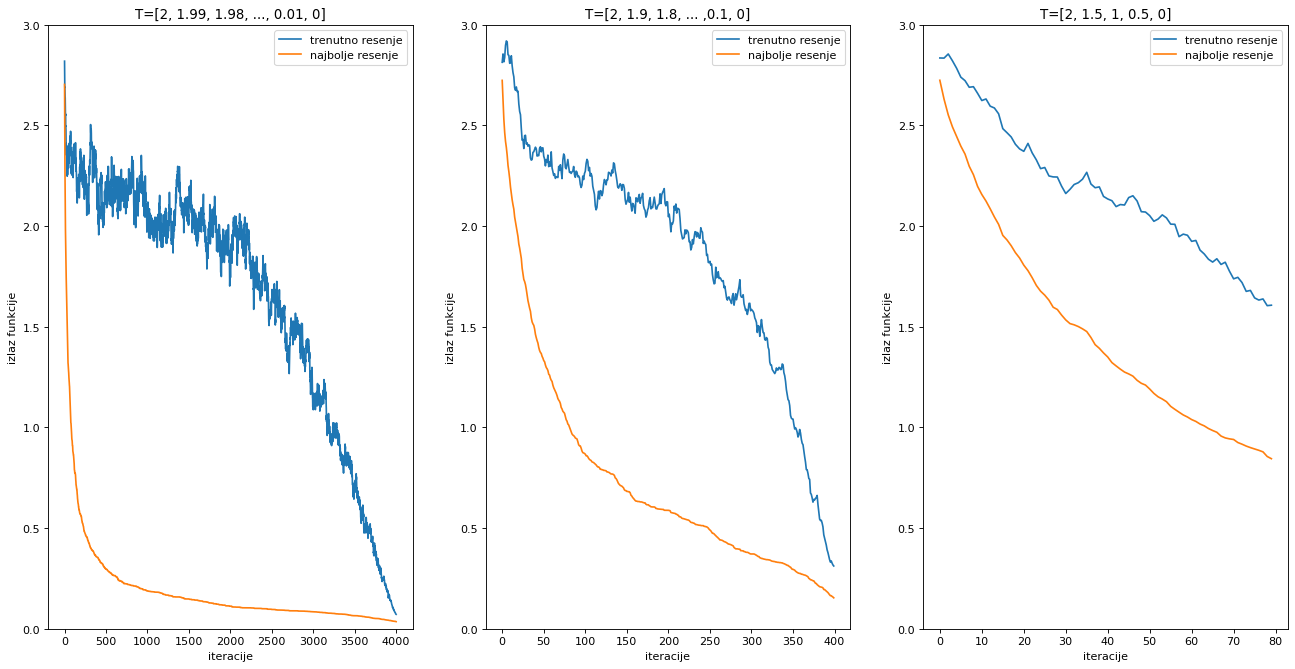

In [4]:
T1 = np.arange(201)/100
T1 = np.flip(T1)

T2 = np.arange(21)/10
T2 = np.flip(T2)

T3 = np.array([2, 1.5, 1, 0.5, 0])
M = 20
foutput1 = np.zeros((T1.size-1)*M)
foutput2 = np.zeros((T2.size-1)*M)
foutput3 = np.zeros((T3.size-1)*M)

fx1 = np.zeros((T1.size-1)*M)
fx2 = np.zeros((T2.size-1)*M)
fx3 = np.zeros((T3.size-1)*M)

for i in range(100):
    x = np.random.rand(1, 3)[0]*2
    _, _, fo1, fiks1 = sk(x, T1, M)
    _, _, fo2, fiks2 = sk(x, T2, M)
    _, _, fo3, fiks3 = sk(x, T3, M)
    foutput1 = foutput1 + np.array(fo1)
    foutput2 = foutput2 + np.array(fo2)
    foutput3 = foutput3 + np.array(fo3)
    
    fx1 = fx1 + fiks1
    fx2 = fx2 + fiks2
    fx3 = fx3 + fiks3
    
foutput1 = foutput1/100
foutput2 = foutput2/100
foutput3 = foutput3/100

fx1 = fx1/100
fx2 = fx2/100
fx3 = fx3/100

fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(foutput1.size)
ax[0].plot(t1, fx1, t1, foutput1)
ax[0].set_title('T=[2, 1.99, 1.98, ..., 0.01, 0]')
ax[0].legend(['trenutno resenje', 'najbolje resenje'])
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('iteracije')
ax[0].set_ylabel('izlaz funkcije')

t2 = np.arange(foutput2.size)
ax[1].plot(t2, fx2, t2, foutput2)
ax[1].set_title('T=[2, 1.9, 1.8, ... ,0.1, 0]')
ax[1].legend(['trenutno resenje', 'najbolje resenje'])
ax[1].set_ylim(0, 3)
ax[1].set_xlabel('iteracije')
ax[1].set_ylabel('izlaz funkcije')

t3 = np.arange(foutput3.size)
ax[2].plot(t3, fx3, t3, foutput3)
ax[2].set_title('T=[2, 1.5, 1, 0.5, 0]')
ax[2].legend(['trenutno resenje', 'najbolje resenje'])
ax[2].set_ylim(0, 3)
ax[2].set_xlabel('iteracije')
ax[2].set_ylabel('izlaz funkcije')

Ovo su grafici kako se menja trenutno i najbolje rešenje u zavisnosti od iteracija. Svaka temperatura traje po 5 iteracija. Kao što vidimo prvi grafik sporije konvergira (treba mu oko 2000 iteracija da dobije isti rezultat kao na drugom grafiku posle 400 iteracija) i on je u suštini sličan slučajnoj pretrazi jer temperaturu sporo spušta. Što se tiče poslednjeg grafika on je sličan algoritmu penjanja uzbrdo, jer mu temperatura brzo opadne. Kada temperatura prebrzo opada, onda imamo i mali broj iteracija i algoritam ne stigne da iskonvergira. I kao najbolje rešenje je drugi grafik koji daje dovoljno dobre rezultate i radi kao što bi simulirano kaljenje i trebalo da radi.

Text(0, 0.5, 'temperatura')

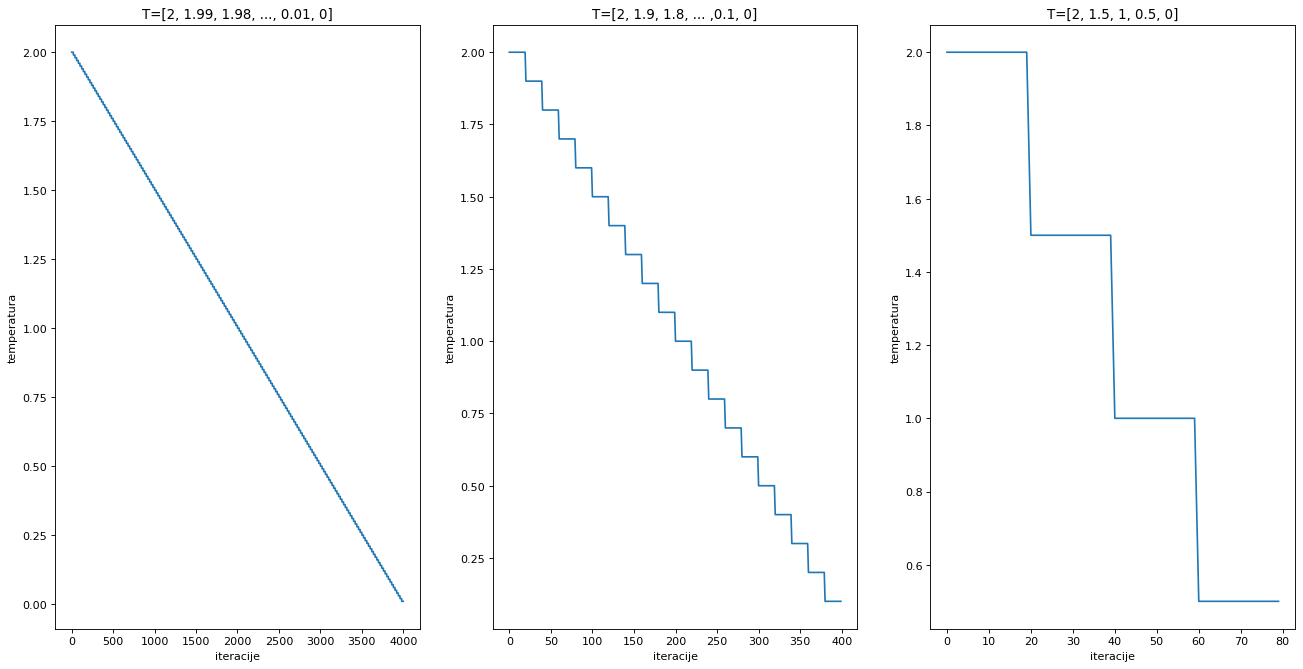

In [5]:
T1 = np.repeat(T1, M)[:-M]
T2 = np.repeat(T2, M)[:-M]
T3 = np.repeat(T3, M)[:-M]
fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(foutput1.size)
ax[0].plot(t1, T1)
ax[0].set_title('T=[2, 1.99, 1.98, ..., 0.01, 0]')
ax[0].set_xlabel('iteracije')
ax[0].set_ylabel('temperatura')

t2 = np.arange(foutput2.size)
ax[1].plot(t2, T2)
ax[1].set_title('T=[2, 1.9, 1.8, ... ,0.1, 0]')
ax[1].set_xlabel('iteracije')
ax[1].set_ylabel('temperatura')

t3 = np.arange(foutput3.size)
ax[2].plot(t3, T3)
ax[2].set_title('T=[2, 1.5, 1, 0.5, 0]')
ax[2].set_xlabel('iteracije')
ax[2].set_ylabel('temperatura')

Ovi grafici predstavljaju promenu temperature kroz iteracije za sva tri slučaja.

# Pretraga po snopu

Kada je pretraga po snopu u pitanju, prvo ću generisati $bd$ rešenja i izabrati $naj$ najboljih (pogledati algoritam). Onda ću od njih generisati još po $bd$ rešenja koristeći formulu:
$$ x' = x + random(-0.1, 0.1)$$
Ukoliko $x'$ ispadne iz domena, onda ponovim računanje $x'$ iz istog razloga kao što sam rekao u prethodnoj tački.

In [6]:
def pps(bd: int, naj: int, broj_iteracija: int) -> tuple:
    """
    
    
    
     Parameters
    ----------
    bd : int
        Broj dece.
    naj : int
        Biranje naj najboljih.
    broj_iteracija: int
        Broj iteracija algoritma.
    
    Returns
    -------
    tuple
        Pretraga po snopu.

    """
    x = np.random.rand(bd, 3)*2
    najbolje = 10000
    najbolje_x = x[0, :]
    najbolje1 = 100000
    prosecni = []
    lista_najboljih = []
    for i in range(broj_iteracija):
        najbolje1 = najbolje
        naj_deca = list(x)
        naj_deca = sorted(naj_deca, key=func)
        p = 0
        for i in naj_deca:
            p = p + func(i) 
        naj_deca = naj_deca[0:naj]
        prosecni = prosecni + [p*3/x.size]
        x = np.array([])
        for i in naj_deca:
            x1 = np.array([])
            for j in range(bd):
                if x1.size == 0:
                    x1 = i + np.random.rand(1, 3)[0]*0.2-0.1
                    while np.any(x1<0) or np.any(x1>2):
                        x1 = i + np.random.rand(1, 3)[0]*0.2-0.1
                else:
                    x2 = i + np.random.rand(1,3)[0]*0.2-0.1
                    while np.any(x2<0) or np.any(x2>2):
                        x2 = i + np.random.rand(1, 3)[0]*0.2-0.1
                    x1 = np.vstack([x1, x2])
            if x.size == 0:
                x = x1
            else:
                x = np.append(x, x1, axis=0)
            if najbolje > func(i):
                najbolje = func(i)
                najbolje_x = i
        lista_najboljih = lista_najboljih + [najbolje]
    return np.array(lista_najboljih), np.array(prosecni)

Funkciji za pretragu po snopu sam prosledio tri parametra. Prvi argument je broj dece koji se generiše jedan od čvorova u jednoj iteraciji, drugi argument je koliko najboljih čvorova zadržava algoritam, a treći je broj iteracija koje algoritam radi. Izlaz funkcije je tuple od liste najboljih i liste prosečnih u svakoj iteraciji.

Text(0, 0.5, 'izlaz funkcije')

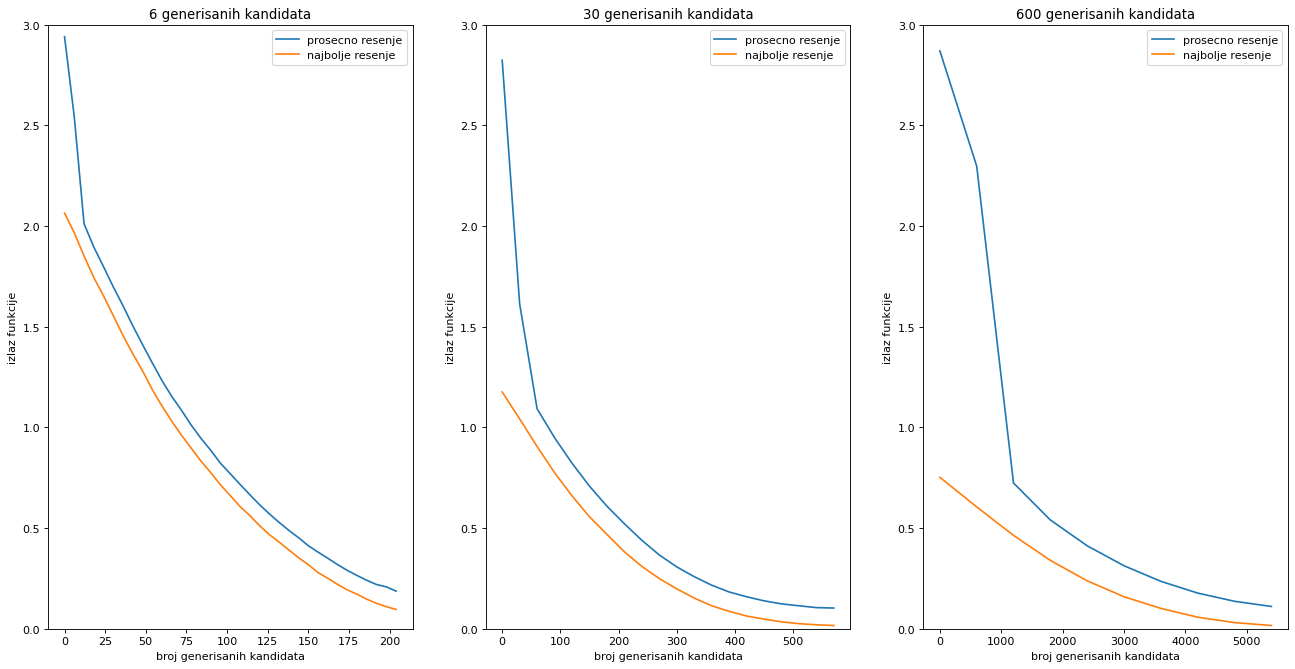

In [7]:
najbolji = np.array([])
prosecni = np.array([])
for i in range(100):
    l_n, pr = pps(3, 2, 35)
    if najbolji.size == 0:
        najbolji = l_n
        prosecni = pr
    else:
        najbolji = najbolji + l_n
        prosecni = prosecni + pr
najbolji = najbolji/100
prosecni = prosecni/100

fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(najbolji.size)*6
ax[0].plot(t1, prosecni, t1, najbolji)
ax[0].set_title('6 generisanih kandidata')
ax[0].legend(['prosecno resenje', 'najbolje resenje'])
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('broj generisanih kandidata')
ax[0].set_ylabel('izlaz funkcije')

najbolji = np.array([])
prosecni = np.array([])
for i in range(100):
    l_n, pr = pps(10, 3, 20)
    if najbolji.size == 0:
        najbolji = l_n
        prosecni = pr
    else:
        najbolji = najbolji + l_n
        prosecni = prosecni + pr
najbolji = najbolji/100
prosecni = prosecni/100

t1 = np.arange(najbolji.size)*30
ax[1].plot(t1, prosecni, t1, najbolji)
ax[1].set_title('30 generisanih kandidata')
ax[1].legend(['prosecno resenje', 'najbolje resenje'])
ax[1].set_ylim(0, 3)
ax[1].set_xlabel('broj generisanih kandidata')
ax[1].set_ylabel('izlaz funkcije')

najbolji = np.array([])
prosecni = np.array([])
for i in range(100):
    l_n, pr = pps(30, 20, 10)
    if najbolji.size == 0:
        najbolji = l_n
        prosecni = pr
    else:
        najbolji = najbolji + l_n
        prosecni = prosecni + pr
najbolji = najbolji/100
prosecni = prosecni/100

t1 = np.arange(najbolji.size)*600
ax[2].plot(t1, prosecni, t1, najbolji)
ax[2].set_title('600 generisanih kandidata')
ax[2].legend(['prosecno resenje', 'najbolje resenje'])
ax[2].set_ylim(0, 3)
ax[2].set_xlabel('broj generisanih kandidata')
ax[2].set_ylabel('izlaz funkcije')


Rezultati kada generišem 6 kandidata su dobri tek nakon 35 iteracija. Problem kod ovog prvog
pristupa je što je ve ́ca verovatno ́ca da svi novogenerisani kandidati budu lošiji od starog nego u
sluˇcaju kada imamo više generisanih suseda. Ukoliko je broj kandidata koje posmatramo previše
mali onda algoritam praktiˇcno postaje gramziva pretraga. Zbog toga je bitno staviti ve ́ci broj kan-
didata koje posmatramo. (Ukupno generisano je $6 \cdot 35 = 210$ kandidata)
Na drugom grafiku vidimo bolje rezultate. Ve ́c posle 20 iteracija dolazimo do dobrog rešenja i to su
po mom mišljenju optimalni parametri za pretragu po snopu. (Ukupno generisano $30 \cdot 20 = 600$
kandidata)
Na poslednjem grafiku nailazimo naizgled na najbolje rezultate, jer ve ́c posle 12 iteracija dolazimo
do rešenja. Kako imamo ogroman broj generisanih kandidata, ova pretraga je najsliˇcnija pretrazi
po širini. Ova pretraga je sporija u odnosu na prve dve i zahteva ve ́ce memorijsko zauze ́ce. Zbog
toga treba težiti ka manjim vrednostima parametara. (Ukupno generisano $600 \cdot 10 = 6000$ kad-
nidata)
Kao što vidimo, drugi i tre ́ci pristup daju sliˇcne rezultate, samo što je tre ́ci pristup mnogo sporiji od
drugog, generisao je 10 puta više kandidata i zbog toga je i prostorno manje efikasan od drugog.
Prvi pristup daje solidno dobre rezultate s obzirom na tako mali broj novogenerisanih kandidata,
ali bih se ipak držao drugog pristupa.

# Genetski algoritam

Genetski algoritam ima nekoliko stvari za koje se treba odlučiti, a to su kako napraviti selekciju, ukrštanje i mutaciju. Ukrštanje sam radio tako što sam koristio geometrijsku sredinu neke 2 koordinate. Na nasumičan način sam radio na jedan od ova dva načina ukrštanja.
$$novo_{1} = \sqrt{x_{11}\cdot x_{22}}, novo_{2} = \sqrt{x_{12}\cdot x_{21}}, novo_{3} = \sqrt{x_{13}\cdot x_{23}}$$
ili
$$novo_{1} = \sqrt{x_{11}\cdot x_{21}}, novo_{2} = \sqrt{x_{12}\cdot x_{23}}, novo_{3} = \sqrt{x_{13}\cdot x_{22}}$$

gde se radi ukrštanje vektora $x_{1} = (x_{11}, x_{12}, x_{13})$ i $x_{2} = (x_{21}, x_{22}, x_{23})$, a rezultat njihovog ukrštanja je vektor $novo$.

Ovaj metod nije najoptimalniji, jer geometrijska sredina vraća broj između najmanjeg i najvećeg broja čiju geometrijsku sredinu tražimo, a pošto je rešenje u nula vektoru, nakon što se gometrijska sredina izkonvergira onda samo mutacije mogu da dovedu do rešenja. Pored ovoga sam razmatrao i aritmetičku sredinu, ali ona je veća od gometrijske tako da sam od nje odustao. Mutacije sam napravio tako da se svakoj koordinati sa verovatnoćom 20% dodaje nasumičan broj između -0.1 i 0.1. Konačno selekciju sam radio tako što sam izabrao 50% najboljih kandidata od cele populacije i napravio 90% nove poplacije ukrštanjem od njih, a ostalih 10% sam zadržao od stare generacije (elitizam).

In [8]:
def ga(num: int, iteracije: int) -> tuple:
    """
    
    
     Parameters
    ----------
    num : int
        Velicina populacije.
    iteracije : int
        Broj iteracija.

    Returns
    -------
    tuple
        Genetski algoritam.

    """
    # inicijalizacija
    x = np.random.rand(num, 3)*2
    verovatnoce = np.arange(num) + 1
    verovatnoce = verovatnoce / np.sum(verovatnoce)
    verovatnoce = np.flip(verovatnoce)
    verovatnoce = np.cumsum(verovatnoce)
    prosecni = []
    najbolji = []
    for k in range(iteracije):
        suma = 0
        for i in x:
            suma = suma + func(i)
        prosecni = prosecni + [suma/num]
        naj_deca = list(x)
        naj_deca = sorted(naj_deca, key=func)
        najbolji = najbolji + [func(naj_deca[0])]
        za_ukrstanje = np.random.rand(1, int(1.8*num))[0]
        # selekcija
        for i in range(int(1.8*num)):
            for j in range(int(1.8*num)):
                if za_ukrstanje[i] < verovatnoce[j]:
                    za_ukrstanje[i] = j
                    break
        
        x = np.array([])
        for i in range(int(1.8*num)//2):
            # ukrstanje
            prvi = naj_deca[int(za_ukrstanje[2*i])]
            drugi = naj_deca[int(za_ukrstanje[2*i+1])]
            novi = np.zeros(3)
            presek = random.randint(1, 2)
            if presek == 1:
                novi[0] = math.sqrt(prvi[0]*drugi[0])
                novi[1] = math.sqrt(prvi[1]*drugi[2])
                novi[2] = math.sqrt(prvi[2]*drugi[1])
            else:
                novi[0] = math.sqrt(prvi[0]*drugi[1])
                novi[1] = math.sqrt(prvi[1]*drugi[0])
                novi[2] = math.sqrt(prvi[2]*drugi[2])
            # mutacija
            verovatnoca_mutacije = np.random.rand(1,3)[0]
            mutacija = np.random.rand(1, 3)[0]*0.2 - 0.1
            mutacija[verovatnoca_mutacije>0.2] = 0
            novi1 = novi + mutacija
            while np.any(novi1<0) or np.any(novi1>2):
                mutacija = np.random.rand(1, 3)[0]*0.2 - 0.1
                mutacija[verovatnoca_mutacije>0.2] = 0
                novi1 = novi + mutacija
            novi = novi1
            if x.size == 0:
                x = novi
            else:
                x = np.vstack([x, novi])
        for i in range(num//10):
            x = np.vstack([x, naj_deca[i]])
    naj_deca = list(x)
    naj_deca = sorted(naj_deca, key=func)
    suma = 0
    for i in x:
        suma = suma + func(i)
    prosecni = prosecni + [suma/num]
    najbolji = najbolji + [func(naj_deca[0])]
    return np.array(prosecni), np.array(najbolji)

Text(0, 0.5, 'izlaz funkcije')

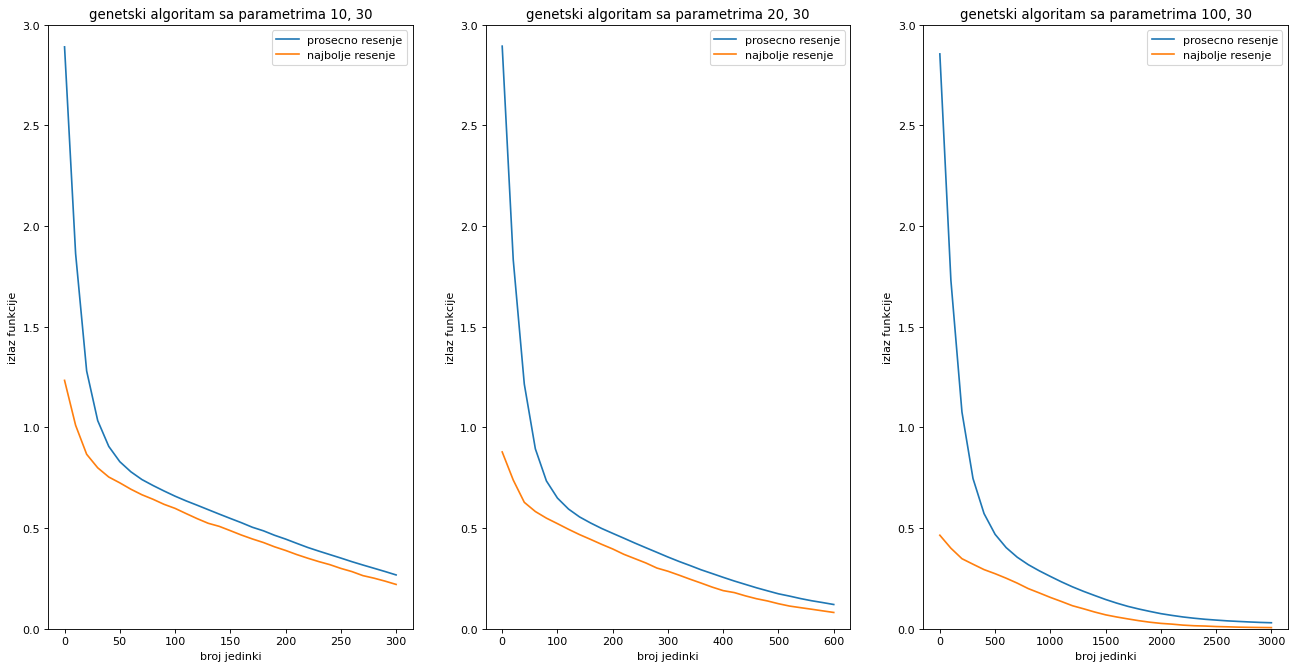

In [9]:
prosecni = np.array([])
najbolji = np.array([])

for i in range(100):
    p, n = ga(10, 30)
    if prosecni.size == 0:
        prosecni = p
        najbolji = n
    else:
        prosecni = prosecni + p
        najbolji = najbolji + n

prosecni = prosecni/100
najbolji = najbolji/100
fig, ax = plt.subplots(1, 3, figsize=(20,10), dpi=80);
t1 = np.arange(najbolji.size)*10
ax[0].plot(t1, prosecni, t1, najbolji)
ax[0].set_title('genetski algoritam sa parametrima 10, 30')
ax[0].legend(['prosecno resenje', 'najbolje resenje'])
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('broj jedinki')
ax[0].set_ylabel('izlaz funkcije')

prosecni = np.array([])
najbolji = np.array([])

for i in range(100):
    p, n = ga(20, 30)
    if prosecni.size == 0:
        prosecni = p
        najbolji = n
    else:
        prosecni = prosecni + p
        najbolji = najbolji + n

prosecni = prosecni/100
najbolji = najbolji/100
t1 = np.arange(najbolji.size)*20
ax[1].plot(t1, prosecni, t1, najbolji)
ax[1].set_title('genetski algoritam sa parametrima 20, 30')
ax[1].legend(['prosecno resenje', 'najbolje resenje'])
ax[1].set_ylim(0, 3)
ax[1].set_xlabel('broj jedinki')
ax[1].set_ylabel('izlaz funkcije')

prosecni = np.array([])
najbolji = np.array([])

for i in range(100):
    p, n = ga(100, 30)
    if prosecni.size == 0:
        prosecni = p
        najbolji = n
    else:
        prosecni = prosecni + p
        najbolji = najbolji + n

prosecni = prosecni/100
najbolji = najbolji/100
t1 = np.arange(najbolji.size)*100
ax[2].plot(t1, prosecni, t1, najbolji)
ax[2].set_title('genetski algoritam sa parametrima 100, 30')
ax[2].legend(['prosecno resenje', 'najbolje resenje'])
ax[2].set_ylim(0, 3)
ax[2].set_xlabel('broj jedinki')
ax[2].set_ylabel('izlaz funkcije')

Rezultati pokazuju da smo na prvom grafiku daleko od rešenja. Drugi i teći daju bolje rezultate. Međutim treći grafik ima 3000 generisanih kandidata što čini ovaj algoritam dosta prostorno zahtevnijim od prva dva. Opet moj izbor bi bio drugi algoritam i možda bih povećao broj iteracija kako bih dobio još bolje rezultate. Po mom mišljenju pretraga po snopu najbolje radi u ovom slučaju. Možda bi genetski algoritam bolje radio sa nekom drugom metodom ukrštanja. 

# Histogram

Text(0.5, 0, 'Broj generisanih kandidata do najboljeg resenja')

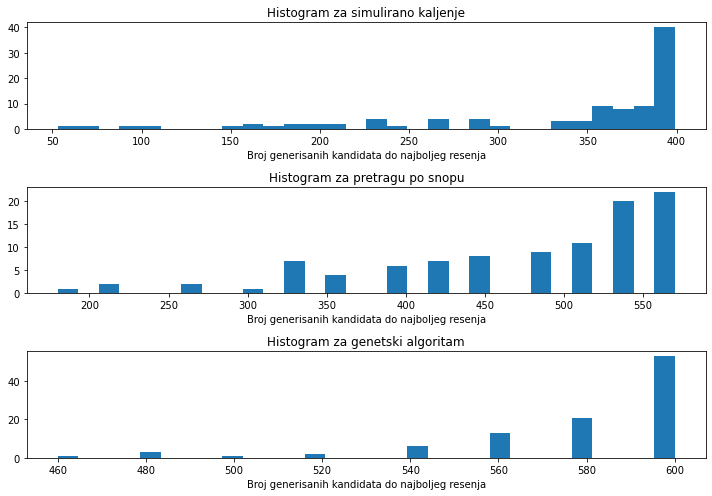

In [10]:
# simulirano kaljenje
T = np.arange(21)/10
T = np.flip(T)

najbolji_sk = []
output_sk = []
for i in range(100):
    x = np.random.rand(1, 3)[0]*2
    _, _, fo, fiks = sk(x, T, M)
    najbolji_sk = najbolji_sk + [np.argmin(fo)]
    output_sk = output_sk + [np.min(fo)]
    
# pretraga po snopu
najbolji_pps = []
output_pps = []
for i in range(100):
    l_n, pr = pps(10, 3, 20)
    najbolji_pps = najbolji_pps + [np.argmin(l_n)*30]
    output_pps = output_pps + [np.min(l_n)]
    
# genetski algoritam
najbolji_ga = []
output_ga = []
for i in range(100):
    p, n = ga(20, 30)
    najbolji_ga = najbolji_ga + [np.argmin(n)*20]
    output_ga = output_ga + [np.min(n)]
    
fig, ax = plt.subplots(3, 1, figsize =(10, 7), tight_layout = True)
n_bins = 30
ax[0].hist(np.array(najbolji_sk), bins = n_bins)
ax[0].set_title('Histogram za simulirano kaljenje')
ax[0].set_xlabel('Broj generisanih kandidata do najboljeg resenja')
ax[1].hist(np.array(najbolji_pps), bins = n_bins)
ax[1].set_title('Histogram za pretragu po snopu')
ax[1].set_xlabel('Broj generisanih kandidata do najboljeg resenja')
ax[2].hist(np.array(najbolji_ga), bins = n_bins)
ax[2].set_title('Histogram za genetski algoritam')
ax[2].set_xlabel('Broj generisanih kandidata do najboljeg resenja')

Text(0.5, 0, 'Najbolje resenje')

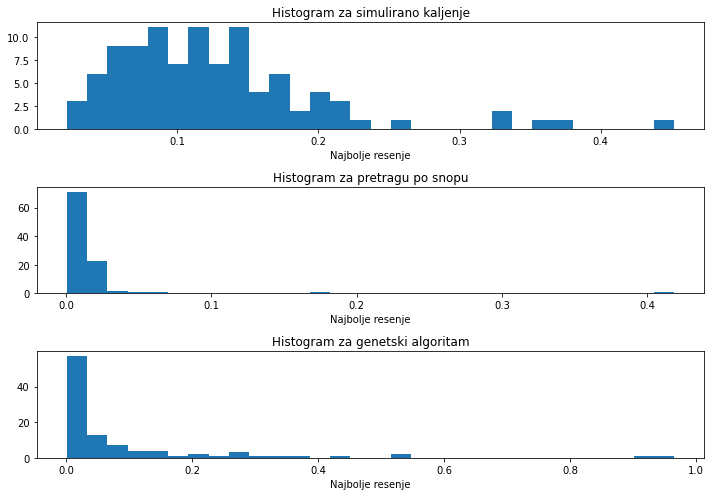

In [11]:
fig, ax = plt.subplots(3, 1, figsize =(10, 7), tight_layout = True)
n_bins = 30
ax[0].hist(np.array(output_sk), bins = n_bins)
ax[0].set_title('Histogram za simulirano kaljenje')
ax[0].set_xlabel('Najbolje resenje')
ax[1].hist(np.array(output_pps), bins = n_bins)
ax[1].set_title('Histogram za pretragu po snopu')
ax[1].set_xlabel('Najbolje resenje')
ax[2].hist(np.array(output_ga), bins = n_bins)
ax[2].set_title('Histogram za genetski algoritam')
ax[2].set_xlabel('Najbolje resenje')

In [12]:
from tabulate import tabulate
std_sk = np.std(np.array(output_sk))
std_pps = np.std(np.array(output_pps))
std_ga = np.std(np.array(output_ga))

mean_sk = np.mean(np.array(output_sk))
mean_pps = np.mean(np.array(output_pps))
mean_ga = np.mean(np.array(output_ga))
table = [['SK mean', 'SK std', 'PPS mean', 'PPS std', 'GA mean', 'GA std']]
table = table +[[mean_sk, std_sk, mean_pps, std_pps, mean_ga, std_ga]]
print("Najbolje resenje:")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Najbolje resenje:
╒═══════════╤══════════╤════════════╤═══════════╤═══════════╤══════════╕
│   SK mean │   SK std │   PPS mean │   PPS std │   GA mean │   GA std │
╞═══════════╪══════════╪════════════╪═══════════╪═══════════╪══════════╡
│  0.127174 │ 0.076046 │  0.0181341 │ 0.0442626 │ 0.0907581 │ 0.162757 │
╘═══════════╧══════════╧════════════╧═══════════╧═══════════╧══════════╛


In [13]:
std_sk = np.std(np.array(najbolji_sk))
std_pps = np.std(np.array(najbolji_pps))
std_ga = np.std(np.array(najbolji_ga))

mean_sk = np.mean(np.array(najbolji_sk))
mean_pps = np.mean(np.array(najbolji_pps))
mean_ga = np.mean(np.array(najbolji_ga))
table = [['SK mean', 'SK std', 'PPS mean', 'PPS std', 'GA mean', 'GA std']]
table = table +[[mean_sk, std_sk, mean_pps, std_pps, mean_ga, std_ga]]
print("Broj generisanih kandidata: ")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Broj generisanih kandidata: 
╒═══════════╤══════════╤════════════╤═══════════╤═══════════╤══════════╕
│   SK mean │   SK std │   PPS mean │   PPS std │   GA mean │   GA std │
╞═══════════╪══════════╪════════════╪═══════════╪═══════════╪══════════╡
│    333.05 │  86.0403 │      473.4 │   95.3018 │     579.4 │  30.6535 │
╘═══════════╧══════════╧════════════╧═══════════╧═══════════╧══════════╛


Simulirano kaljenje najbrže u proseku dolazi do najboljeg rešenja, ali je prosečno najbolje rešenje dosta lošije od druga dva algoritma. Standardna devijacija za broj potomaka je isto dosta velika što nam ukazuje na to da algoritam može da pogodi dobro rešenje u početku. S druge strane pretraga po snopu daje najbolje rezultate. Brže dolazi do najboljeg rešenja od genetskog algoritma (to rešenje je u proseku bolje od rešenja koje genetski algoritam nudi). Takođe standardna devijacija za broj generisanih kandidata je najveća što znači da može da se desi da jako brzo dođe do najboljeg rešenja. To dosta zavisi od početnih tačaka. Genetski algoritam najviše memorije zahteva i najsporiji je, ali daje solidno dobre rezultate. Rezultati su sličniji pretrazi po snopu nego simuliranom kaljenju. Standardna devijacija za broj potomaka je mala, to znači da algoritam konvergira ka najboljem rešenju, jer su mu najbolji rezultati uglavnom u poslednjim iteracijama.